# **Penjelasan Deteksi Outlier**
### **Menggunakan K-Nearest Neighbors (KNN) dalam Analisis Data**  
## 1. Apa Itu Deteksi Outlier?
Outlier adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam dataset. Penyebab utama outlier bisa berasal dari kesalahan pengukuran, kesalahan input data, atau karakteristik unik dari data itu sendiri. Kehadiran outlier dapat menyebabkan distorsi dalam analisis data dan menurunkan performa model machine learning. Oleh karena itu, deteksi outlier menjadi langkah penting untuk mengidentifikasi dan menangani data yang menyimpang dari pola utama.

## 2. Kenapa KNN Cocok untuk Deteksi Outlier?
K-Nearest Neighbors (KNN) merupakan metode berbasis jarak yang dapat digunakan untuk mengenali pola dalam data, termasuk mendeteksi outlier. Prinsip utama dalam deteksi outlier dengan KNN adalah sebagai berikut:

Jika suatu titik data memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu, maka titik tersebut kemungkinan besar merupakan outlier.
Jika jarak rata-rata ke K tetangga terdekat cukup besar dibandingkan dengan titik lainnya, maka titik tersebut dapat dianggap sebagai outlier.
## 3. Proses Deteksi Outlier dengan KNN
a. Menghitung Jarak Antar Titik Data
Untuk mengukur kedekatan antara satu titik dengan titik lainnya, berbagai metrik jarak dapat digunakan, seperti:
Euclidean Distance (jarak lurus antara dua titik dalam ruang multidimensi).
Manhattan Distance (jarak berbasis grid yang dijumlahkan berdasarkan perbedaan koordinat).
Minkowski Distance (generalized metric yang menggabungkan Euclidean dan Manhattan).

b. Menentukan Nilai K (Jumlah Tetangga Terdekat)
Pemilihan nilai K sangat menentukan hasil deteksi outlier:

K kecil → model menjadi terlalu sensitif terhadap noise dan variasi kecil dalam data.
K besar → bisa menyebabkan outlier tidak terdeteksi karena dipengaruhi oleh banyak tetangga.

c. Menilai Kepadatan Data untuk Identifikasi Outlier
Ada beberapa metode yang digunakan dalam KNN untuk menentukan apakah suatu titik merupakan outlier atau bukan:
K-Nearest Neighbor Distance
Mengukur jarak rata-rata ke K tetangga terdekat. Jika nilai ini jauh lebih besar dibandingkan dengan titik lainnya, maka titik tersebut bisa dikategorikan sebagai outlier.
Local Outlier Factor (LOF)
LOF mengevaluasi kepadatan lokal suatu titik dengan membandingkannya terhadap tetangganya. Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangga terdekatnya, maka titik tersebut bisa diklasifikasikan sebagai outlier.
Distance-Based Outlier Score
Jika jumlah tetangga dalam radius tertentu sangat sedikit, maka besar kemungkinan titik tersebut adalah outlier.
## 4. Kelebihan dan Kekurangan KNN dalam Deteksi Outlier
### Kelebihan:

Konsepnya sederhana dan mudah dipahami karena hanya berbasis jarak.

Tidak bergantung pada asumsi distribusi data tertentu, sehingga fleksibel untuk berbagai dataset.

Bisa digunakan untuk data berdimensi tinggi.

### Kekurangan:

Memiliki biaya komputasi tinggi, terutama untuk dataset besar, karena

memerlukan perhitungan jarak terhadap banyak titik.

Sensitif terhadap pemilihan nilai K, di mana pemilihan yang kurang tepat bisa menurunkan akurasi deteksi outlier.

### Kesimpulan

K-Nearest Neighbors (KNN) dapat digunakan sebagai metode deteksi outlier dengan menganalisis hubungan jarak antara titik data dan tetangga terdekatnya. Pendekatan seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF) memungkinkan identifikasi titik yang memiliki kepadatan rendah atau jarak jauh dari kelompok data lainnya. Oleh karena itu, pemilihan nilai K dan metrik jarak yang sesuai menjadi faktor penting dalam keberhasilan deteksi outlier menggunakan KNN.

 

In [1]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Code ini bertujuan untuk mendeteksi outlier dalam dataset Iris menggunakan jarak Euclidean antara titik data dan titik referensi terakhir

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  4.482187    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 45.476587     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  4.588028    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  4.403408    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  4.491102    False
  6     Iris-setosa           1.7          0.4           5.4          3.9  4.213075    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  4.487761    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  4.379498    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  4.536518    False
 10     Iris-setosa           1.5          0.1           4.9          

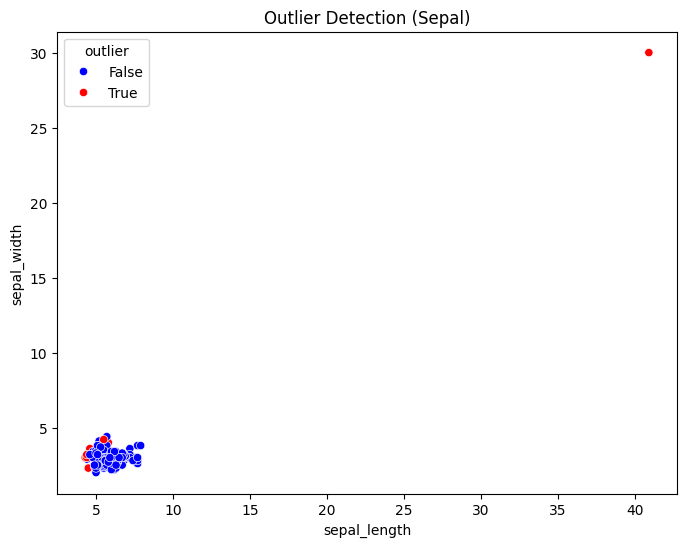

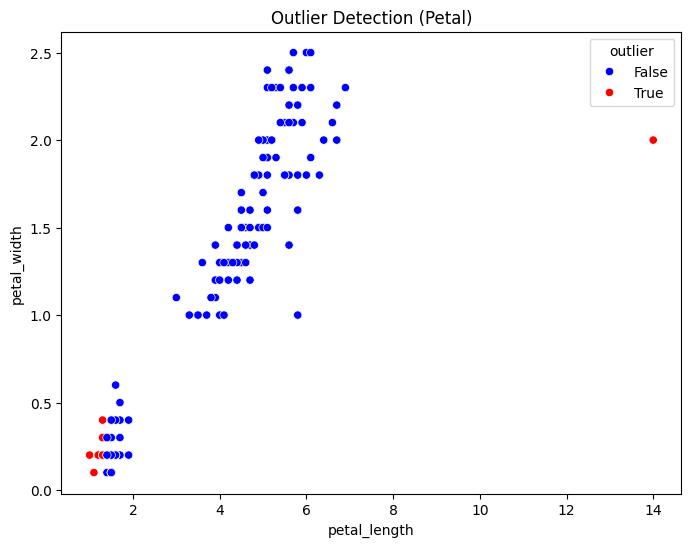

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


## Fungsi code ini menghitung jumlah total outlier dalam dataset setelah dilakukan deteksi outlier menggunakan jarak Euclidean

In [3]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


## Kode ini berfungsi untuk mengurutkan data berdasarkan jarak Euclidean dari yang terkecil hingga terbesar dan menampilkannya dalam bentuk tabel.

In [4]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
151             ???           5.8          1.0           5.1          3.2  0.000000    False
135  Iris-virginica           5.6          1.4           6.1          2.6  1.249000    False
150  Iris-virginica           5.1          1.8           5.9          3.0  1.345362    False
 84 Iris-versicolor           5.1          1.6           6.0          2.7  1.382027    False
143  Iris-virginica           5.1          1.9           5.8          2.7  1.428286    False
102  Iris-virginica           5.1          1.9           5.8          2.7  1.428286    False
 85 Iris-versicolor           4.5          1.5           5.4          3.0  1.438749    False
104  Iris-virginica           5.6          1.8           6.3          2.9  1.486607    False
122  Iris-virginica           4.9          2.0           5.6          2.8  1.489966    False
 67 Iris-versicolor           4.5          1.5           5.6          